<a href="https://colab.research.google.com/github/ribollequis87/logica_mat_discreta/blob/main/MD_PROVAPARCIAL_1SEM2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LÓGICA E MATEMÁTICA DISCRETA - 1o. SEMESTRE 2024**
###**PROVA PARCIAL - 25/03/2024**

**NOME: Gustavo Colombi Ribolla**

**E-mail: gustavocr2@al.insper.edu.br**

**GitHub: ribollequis87**

**QUESTÃO 1 (2.0 pontos)** Um número n, n>=2, é chamado de primo **se e somente se** ele for divisível por 1 e por ele mesmo. **Utilizando o módulo flloat, mostre que todo número par maior que 2 não pode ser um número primo.**

In [53]:
!pip install flloat

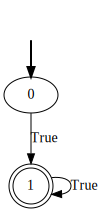

In [54]:

from flloat.parser.ltlf import LTLfParser

parser = LTLfParser()
formula = "F ((numero & par & maior_que_dois & ((numero & !(apenas_divisivel_por_1_e_ele) -> !(primo)) & (numero & par & maior_que_dois -> !(apenas_divisivel_por_1_e_ele)))) -> !(primo))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
g = dfa.to_graphviz()
g

# Fiz em forma de tautologia para mostrar que quando tenho um número, par e maior que dois, ele sempre será diferente de primo

**QUESTÃO 2 (3.0 pontos)** Um flip-flop tipo D é um pequeno componente muito utilizado na construção de registradores para armazenar dados temporários num processador. Neste componente, temos três linhas de sinal importantes: D (dado que vai ser armazenado no flip-flop), clk (clock, relógio para dizer quando o dado será armazenado) e Q(local do dado armazenado), conforme mostrado na figura abaixo:



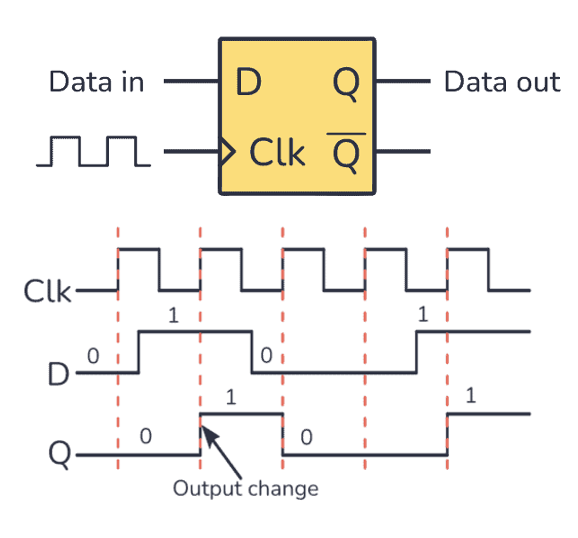

Nos circuitos digitais seu funcionamento é muito simples e segue as seguintes regras:

* Quando o relógio (clk) muda de 0 para 1 (sobe), o valor de D é copiado em Q.

* Quando o relógio (clk) muda de 1 para 0 (desce), o valor de Q é mantido.

**2.1 (2.0 pontos)** Modele este pequeno componente com a Lógica LTL.

In [4]:
!pip install pyModelChecking

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.9 MB/s eta 0:00:00


In [55]:
from pyModelChecking.LTL import *
p = Parser()
print(p.grammar)


        formula: s_formula | p_formula

        s_formula: ("A") u_formula      -> forall_formula

        p_formula: u_formula ( ("or"|"|") u_formula )+   -> or_formula
                 | u_formula ( ("and"|"&") u_formula )+   -> and_formula
                 | u_formula ("-->") u_formula        -> imply_formula
                 | u_formula ("U") u_formula        -> until_formula
                 | u_formula ("R") u_formula        -> release_formula
                 | u_formula

        u_formula: "true"                -> true
                 | "false"                -> false
                 | a_prop
                 | "(" p_formula ")"
                 | ("not"|"~") u_formula      -> not_formula
                 | ("X") u_formula      -> next_formula
                 | ("F") u_formula      -> eventually_formula
                 | ("G") u_formula      -> globally_formula

        a_prop: /[a-zA-Z_][a-zA-Z_0-9]*/ -> string
              | ESCAPED_STRING           -> e_string

       

In [56]:
from pyModelChecking import *
from pyModelChecking.LTL import *
p="A(G((clock_1 --> D_copido_em_Q) & (not(clock_1) --> Q_mantido))"
K=Kripke(R=[(0,0)], L={0: set(['p'])})

**2.2 (1.0 ponto)** Mostre, usando o seu modelo LTL do flip-flop D, que não  é possível o flip-flop mudar a saída Q de 1 para 0 quando o relógio (clk) muda de 1 para 0.

In [57]:

modelcheck(K,"A(G(not(clock_1) --> D_copido_em_Q))")

set()

**QUESTÃO 3 (2.0 pontos)** Verifique se a seguinte identidade em Lógica CTL (extensão da LTL) é válida ou não:

### ¬F φ ≡ G ¬φ

In [64]:
from pyModelChecking.CTL import *
p = Parser()
print(p.grammar)


        s_formula: "true"     -> true
                 | "false"    -> false
                 | a_prop
                 | ("A") p_formula       -> forall_formula
                 | ("E") p_formula       -> exists_formula
                 | ("not"|"~") s_formula       -> not_formula
                 | "(" u_formula ")"

        u_formula: s_formula
                  | s_formula ( ("or"|"|") s_formula )+      -> or_formula
                  | s_formula ( ("and"|"&") s_formula )+      -> and_formula
                  | s_formula ("-->") s_formula           -> imply_formula

        p_formula: ("X") s_formula  -> next_formula
                 | ("F") s_formula  -> eventually_formula
                 | ("G") s_formula  -> globally_formula
                 | s_formula ("U") s_formula -> until_formula
                 | s_formula ("R") s_formula -> release_formula
                 | "(" p_formula ")"

        a_prop: /[a-zA-Z_][a-zA-Z_0-9]*/ -> string
              | ESCAPED_STRING          

In [67]:
p="A(not(F(phi)))"
K=Kripke(R=[(0,0)], L={0: set(['p'])})
modelcheck(K,"A(G(not(phi)))")

{0}

**QUESTÃO 4 (3.0 pontos)** O programa Python abaixo, que verifica se um número **n** inteiro é par ou não:

if n%2==0:

    par = True

else:

    par = False

**4.1 (2.0 pontos)** Utilizando a Lógica LTL, construa um Modelo de Kripke para este programa.

In [60]:
from pyModelChecking.LTL import *

In [61]:
K=Kripke(R=[(0,1),(0,3),(1,2),(3,4),(2,2),(4,4)],
         L={0: set(['']),
            1: set(['rddiz']),
            2: set(['pt']),
            3: set(['rdddz']),
            4: set(['pf'])})

# rddiz -> resto da divisão por 2 igual a 0
# pt -> variável par = True
# rdddz -> resto da divisão por 2 diferente de 0
# pf -> variável par = False

**4.2 (1.0 ponto)**  Mostre, usando o seu modelo, que não existe **n** que seja par e ímpar ao mesmo tempo.

In [62]:
from pyModelChecking.CTL import *
modelcheck(K,"pt & pf")

set()